# El Niño-Southern Oscillation (ENSO) Analysis

* Rodrigo Castillo González
* rodrigocastillogl@gmail.com
* (+52) 4444295432

In [1]:
# Utilities
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

## What is El Niño-Southern Oscillation?

**El Niño-Southern Oscillation (ENSO)** is an enigmatic and influential phenomena within the global weather system. It is a recurring climate event characterized by variations in sea surface temperatures and atmospheric pressure in the equatorial Pacific Ocean. Its impact extends far beyond the confines of the Pacific region, exerting a profound influence on weather, agriculture, and ecosystems across the globe.

The ENSO cycle has two anomalies: **El Niño** is a climate phenomenon characterized by the warming of sea surface temperatures in the central and eastern equatorial Pacific Ocean; **La Niña** is the opposite of El Niño, marked by cooler sea surface temperatures in the same region.

The state of the ocean and atmosphere depend on each other, then the main indicators of these changes are pressure and temperature. In addition, the thermal expansion of the warming water raises sea level in these regions, and this change in sea level can be measured by satellite sensors.


## Project description
In this project, we have laid out two primary objectives. Firstly, we will conduct an Exploratory Data Analysis (EDA) with the data provided by [National Oceanic and Atmospheric Administration (NOAA)](https://www.ncei.noaa.gov/access/monitoring/enso/), focusing on variables related to ENSO. Secondly, we will propose a model for predicting the El Niño phenomenon.

## 1 - Exploratory Data Analysis

### Sea Surface Temperature (SST)

Monitoring of ENSO conditions primarily focuses on **Sea Surface Temperature (SST)** anomalies in 4 geographic regions of the equatorial Pacific.


![regions](https://www.ncei.noaa.gov/monitoring-content/teleconnections/nino-regions.gif)

Now we explore the temperature data in each region.

In [2]:
data_dir = 'data'

# Sea surface temperature

sst_file = 'sst.txt'
df_sst = pd.read_csv(os.path.join(data_dir, sst_file), delimiter = '\s+')
df_sst['date'] = pd.to_datetime(df_sst['YR'].astype(str) + '-' + df_sst['MON'].astype(str), format='%Y-%m')

df_sst.head(4)

YR  MON  NINO1+2  ANOM  NINO3  ANOM.1  NINO4  ANOM.2  NINO3.4  ANOM.3  \
0  1982    1    24.28 -0.24  25.84    0.17  28.01   -0.21    26.65    0.08   
1  1982    2    25.38 -0.72  26.26   -0.11  27.99   -0.11    26.54   -0.20   
2  1982    3    25.22 -1.38  26.92   -0.25  28.18   -0.05    27.09   -0.14   
3  1982    4    24.57 -1.16  27.52   -0.05  28.61    0.10    27.83    0.02   

        date  
0 1982-01-01  
1 1982-02-01  
2 1982-03-01  
3 1982-04-01

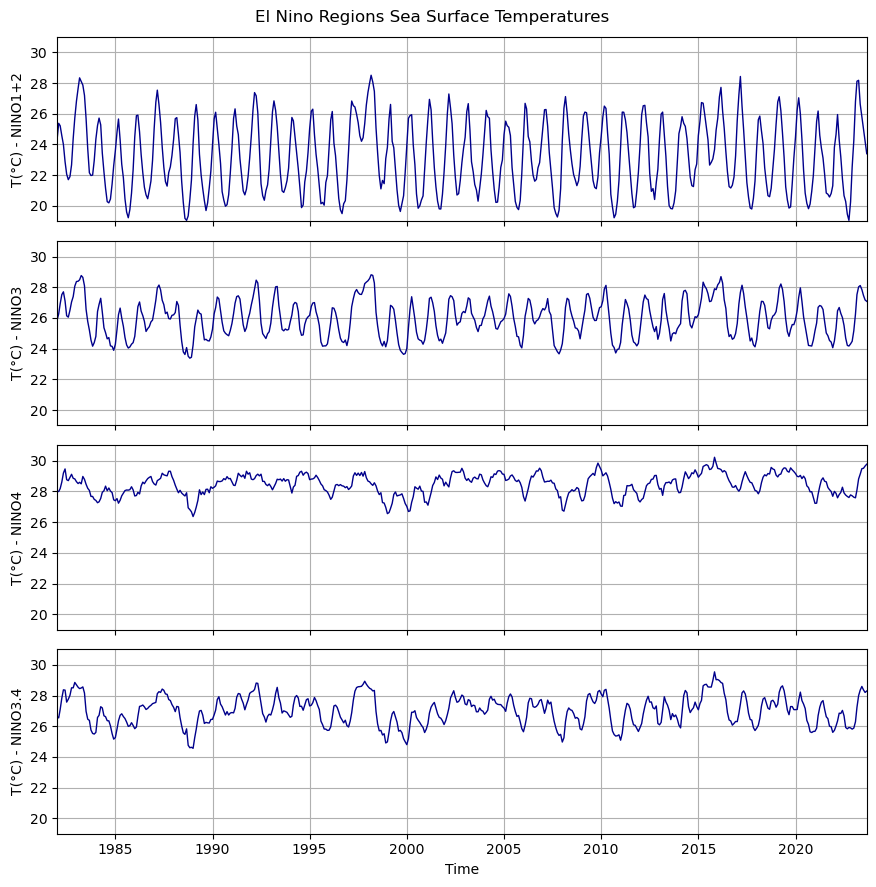

In [3]:
t_lower_bound = 19
t_upper_bound = 31

fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(9, 9))

ax[0].plot(df_sst['date'], df_sst['NINO1+2'], color='darkblue', linewidth = 1 )
ax[1].plot(df_sst['date'], df_sst['NINO3'], color='darkblue', linewidth = 1 )
ax[2].plot(df_sst['date'], df_sst['NINO4'], color='darkblue', linewidth = 1 )
ax[3].plot(df_sst['date'], df_sst['NINO3.4'], color='darkblue', linewidth = 1 )

ax[0].set_ylabel('T(°C) - NINO1+2')
ax[1].set_ylabel('T(°C) - NINO3')
ax[2].set_ylabel('T(°C) - NINO4')
ax[3].set_ylabel('T(°C) - NINO3.4')

for ax_ in ax:
    ax_.grid(True)
    ax_.set_xlim([df_sst['date'].min(), df_sst['date'].max()])
    ax_.set_ylim([19, 31])

fig.suptitle('El Nino Regions Sea Surface Temperatures')
ax[3].set_xlabel('Time')

plt.tight_layout()
plt.show()


As one might guess, the temperature follows a regular pattern, mainly due to the seasons of the year. This pattern is more evident in areas near the continents, like NINO1+2 and NINO3, but it's less obvious in ocean regions farther from land, such as NINO4 and NINO3.4. This difference is because the connection between temperature, pressure, ocean currents, and air movements is intricate and unpredictable, which makes forecasting ENSO quite challenging.

Now, we calculate the Autocorrelation Function (ACF) for three regions, making a comparison between the region nearest to the continent, NINO1+2, and the most critical region in defining the El Niño phenomenon, which is NINO3.4.

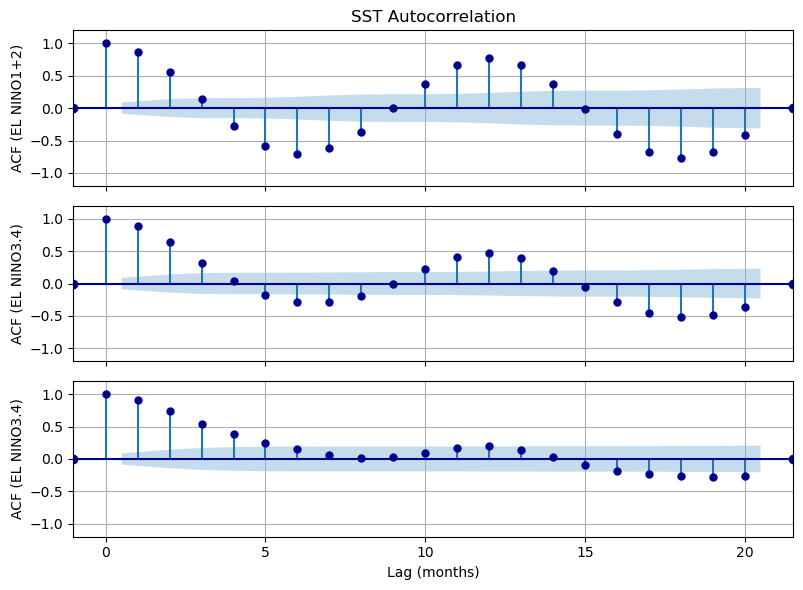

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8, 6))

plot_acf(df_sst['NINO1+2'].to_numpy(), ax=ax[0], lags=20, color='darkblue', marker='o', title ='SST Autocorrelation')
plot_acf(df_sst['NINO3'].to_numpy(), ax=ax[1], lags=20, color='darkblue', marker='o', title ='')
plot_acf(df_sst['NINO3.4'].to_numpy(), ax=ax[2], lags=20, color='darkblue', marker='o', title ='')

ax[0].set_ylabel('ACF (EL NINO1+2)')
ax[1].set_ylabel('ACF (EL NINO3)')
ax[2].set_ylabel('ACF (EL NINO3.4)')

for ax_ in ax:
    ax_.grid(True)
    ax_.set_ylim([-1.2, 1.2])

ax[2].set_xlabel('Lag (months)')
ax[0].set_ylabel('ACF (EL NINO1+2)')
ax[1].set_ylabel('ACF (EL NINO3.4)')

plt.tight_layout()
plt.show()

As previously mentioned, for ELNINO1+2, a significant negative autocorrelation is observed at a 6-month lag, while a substantial positive autocorrelation is evident at a 12-month lag (equivalent to one year). This phenomenon reflects a recurring temperature pattern over time driven by the changing seasons. A similar patter is observed for ELNINO3.

In the case of ELNINO3.4, a lower positive autocorrelation is noticeable at a 12-month lag, indicating that temperature prediction in this region is more challenging and less straightforward.

### Oceanic Niño Index (ONI)
The Oceanic Niño Index (ONI) is a commonly used index to track and classify El Niño and La Niña events. Warm and cold phases are defined as a minimum of five consecutive 3-month running averages of SST anomalies in the NINO3.4 region. 

In [5]:
# Southern Oscillation Index

oni_file = 'oni.txt'
df_oni = pd.read_csv(os.path.join(data_dir, oni_file), delimiter = '\s+')

# add date of the centered month
df_oni['date'] = pd.date_range(start='1950-01-01', end='2023-08-01', freq='MS')

df_oni.head(5)

SEAS    YR  TOTAL  ANOM       date
0  DJF  1950  24.72 -1.53 1950-01-01
1  JFM  1950  25.17 -1.34 1950-02-01
2  FMA  1950  25.75 -1.16 1950-03-01
3  MAM  1950  26.12 -1.18 1950-04-01
4  AMJ  1950  26.32 -1.07 1950-05-01

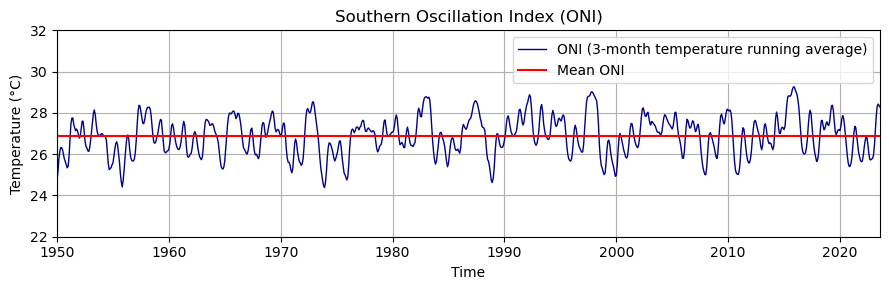

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(9, 3))
ax.plot(df_oni['date'], df_oni['TOTAL'], color='darkblue', linewidth = 1)
ax.axhline(y=df_oni['TOTAL'].mean(), color='red')
ax.set_xlim([df_oni['date'].min(), df_oni['date'].max()])
ax.set_ylim([22, 32])
ax.grid()
ax.legend(['ONI (3-month temperature running average)', 'Mean ONI'])

ax.set_title('Southern Oscillation Index (ONI)')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()

SST anomalies equal to or greater than +0.5°C in the Niño 3.4 region are indicative of El Niño conditions, while anomalies less than or equal to –0.5°C are associated with La Niña conditions. We can plot the deviations of ONI temperature and draw the thresholds. 

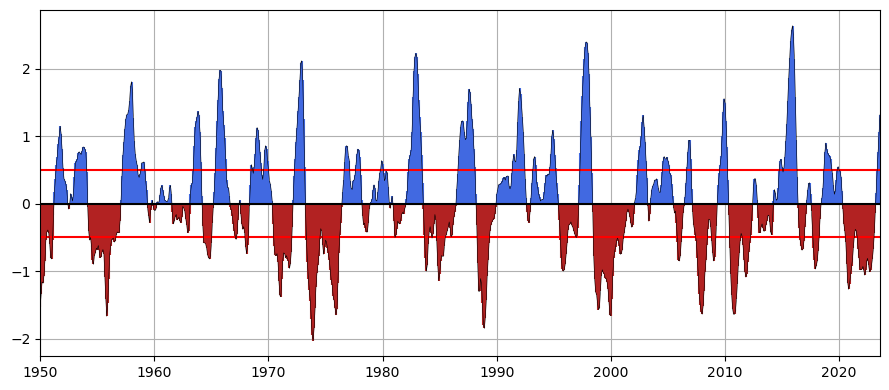

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(9, 4))

# positive
pos_date = df_oni[df_oni['ANOM']>0]['date']
pos_values = df_oni[df_oni['ANOM']>0]['ANOM']
ax.vlines(pos_date, np.zeros_like(pos_values), pos_values, color='royalblue')

# negative
neg_date = df_oni[df_oni['ANOM']<0]['date']
neg_values = df_oni[df_oni['ANOM']<0]['ANOM']
ax.vlines(neg_date, np.zeros_like(neg_values), neg_values, color='firebrick')

# thresholds
ax.axhline(color = 'k')
ax.axhline(y = 0.5, color = 'red')
ax.axhline(y = -0.5, color = 'red')

ax.plot(df_oni['date'], df_oni['ANOM'], color='k', linewidth = 0.4)
ax.grid()
ax.set_xlim([df_oni['date'].min(), df_oni['date'].max()])

plt.tight_layout()
plt.show()

We calculate the Autocorrelation Function (ACF) with the NOI deviation. As the definitions of El Niño and La Niña are reliant on this index, autocorrelation serves as a measure of the predictability of these phenomena.

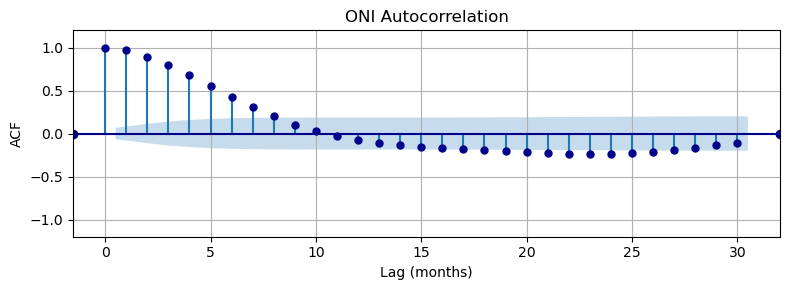

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(8, 3))

plot_acf(df_oni['ANOM'].to_numpy(), ax=ax, lags=30, color='darkblue', marker='o', title ='ONI Autocorrelation')

ax.grid()
ax.set_ylim([-1.2, 1.2])

ax.set_xlabel('Lag (months)')
ax.set_ylabel('ACF')

plt.tight_layout()
plt.show()

We observe a strong positive autocorrelation with short time lags (less than half a year), indicating that information from the previous months is relevant for predicting future values. Conversely, there is a significant negative autocorrelation with lags between 20 and 25 months (approximately 2 years), suggesting a weak periodic nature of these phenomena.

### Southern Oscillation Index (SOI)

The Southern Oscillation Index (SOI) is a standardized index based on the observed Sea Level Pressure (SLP) differences between Tahiti and Darwin, Australia. The SOI is one measure of the large-scale fluctuations in air pressure occurring between the western and eastern tropical Pacific during El Niño and La Niña episodes. The methodology used to calculate SOI is available on [Southern Oscillation Index (SOI)](https://www.ncei.noaa.gov/access/monitoring/enso/soi).

Now we explore this data.

In [9]:
# Southern Oscillation Index

soi_file = 'soi-std.txt'
df_soi = pd.read_csv(os.path.join(data_dir, soi_file), delimiter = '\s+')
df_soi.columns = ['YR'] + ['{:02d}'.format(i) for i in range(1,13)]
df_soi = df_soi.melt(id_vars='YR', var_name = 'MON')
df_soi.sort_values(by=['YR', 'MON'], inplace=True, ignore_index=True)

# add date and filter defalut values
df_soi['date'] = pd.to_datetime(df_soi['YR'].astype(str) + '-' + df_soi['MON'].astype(str), format='%Y-%m')
df_soi = df_soi[df_soi['date'] < '2023-10-01']

df_soi.head(5)

YR MON  value       date
0  1951  01    1.5 1951-01-01
1  1951  02    0.9 1951-02-01
2  1951  03   -0.1 1951-03-01
3  1951  04   -0.3 1951-04-01
4  1951  05   -0.7 1951-05-01

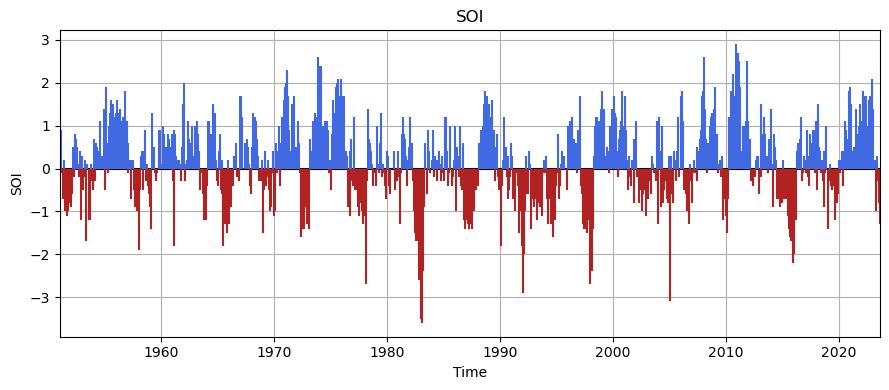

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(9, 4))

ax.axhline(color = 'k')

# positive
pos_date = df_soi[df_soi['value']>0]['date']
pos_values = df_soi[df_soi['value']>0]['value']
ax.vlines(pos_date, np.zeros_like(pos_values), pos_values, color='royalblue')

# negative
neg_date = df_soi[df_soi['value']<0]['date']
neg_values = df_soi[df_soi['value']<0]['value']
ax.vlines(neg_date, np.zeros_like(neg_values), neg_values, color='firebrick')

#ax.plot(df_soi['date'], df_soi['value'], color='k', linewidth = 0.4)
ax.grid()
ax.set_xlim([df_soi['date'].min(), df_soi['date'].max()])

ax.set_title('SOI')
ax.set_xlabel('Time')
ax.set_ylabel('SOI')

plt.tight_layout()
plt.show()

we can see this is a noisy time series. We can smooth the series using a Moving Average Filter and plot the result.

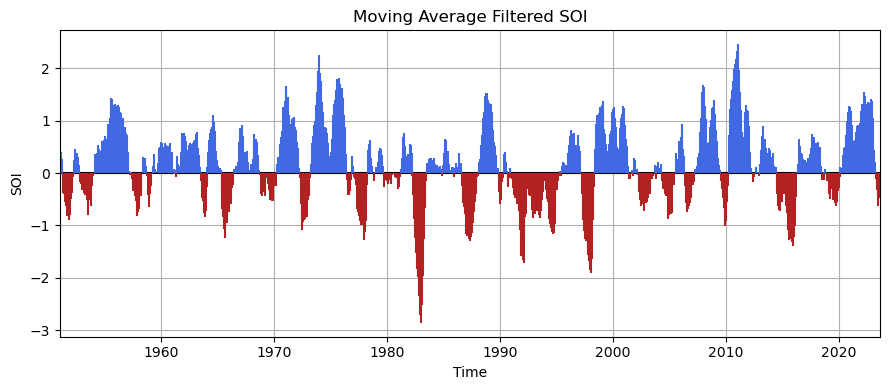

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(9, 4))
ax.axhline(color = 'k')

filtered_values = np.convolve(df_soi['value'].to_numpy(), (1/5)*np.ones(5), mode='same' )

# positive
pos_date = df_soi[filtered_values>0]['date']
pos_values = filtered_values[filtered_values>0]
ax.vlines(pos_date, np.zeros_like(pos_values), pos_values, color='royalblue')

# negative
neg_date = df_soi[filtered_values<0]['date']
neg_values = filtered_values[filtered_values<0]
ax.vlines(neg_date, np.zeros_like(neg_values), neg_values, color='firebrick')

#ax.plot(df_soi['date'], filtered_values, color='k', linewidth = 0.4)
ax.grid()
ax.set_xlim([df_soi['date'].min(), df_soi['date'].max()])

ax.set_title('Moving Average Filtered SOI')
ax.set_xlabel('Time')
ax.set_ylabel('SOI')

plt.tight_layout()
plt.show()

In general, smoothed time series of the SOI correspond very well with changes in ocean temperatures. Prolonged periods of negative (positive) SOI values coincide with abnormally warm (cold) ocean waters across the eastern tropical Pacific typical of El Niño (La Niña) episodes.

## 2 - Predictive Model

Due to time constraints, I'm currently outlining some initial ideas. I'm suggesting the use of a simple autoregressive model, such as a recurrent network with gates like LSTM or GRU based network, which can be trained using the available data.

For instance, you can refer to this example: https://developers.arcgis.com/python/samples/predicting-enso/

Since El Niño and La Niña are defined based on the Oceanic Nino Index (ONI), I recommend using ONI as the primary input attribute. Introducing Sea Surface Temperature (SST) data might not be necessary, as ONI essentially encapsulates that information. However, including the Southern Oscillation Index (SOI) data could be beneficial.

To evaluate the model's performance, considering the limited data available, I propose comparing the model's predictions with those generated by well-established models.

You can refer to this resource for the expected forecasts: https://www.cpc.ncep.noaa.gov/products/analysis_monitoring/lanina/enso_evolution-status-fcsts-web.pdf
